In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_excel('final_data.xlsx')
data

,Product name,Materials,Environmental Score
0,Recycled Cotton Jeans Sweatshirt Men Cassius,24% recycled Cotton 41% recycled Cotton 28% o...,4.44
1,Recycled Cotton Jeans Sweater Men Marlon,"80% recycled cotton, 15% natural cotton, 5% o...",4.60
2,Recycled Cotton Jeans Sweater Men Pablo,"80% recycled cotton, 15% natural cotton, 5% o...",4.60
3,Recycled Cotton Oversize T-shirt Men Yves,50% recycled Cotton 50% organic cotton,4.50
4,Unisex Recycled Cotton Jeans Vest Fred,"80% recycled cotton, 15% natural cotton, 5% o...",4.60
...,...,...,...
832,pontallon,10% Linen 90% Conventional Cotton,1.40
833,Men's T-Shirt,20% Virgin Polyester 10% Linen,0.90
834,shorts,60% Conventional Cotton 20% Virgin Polyester,1.00
835,shorts,80% Wool 10% Linen,1.30


In [3]:
# removing any leading or trailing white spaces in the 'material' column
data['material'] = data['Materials'].str.strip()

In [4]:
# Make a copy of the original DataFrame
data_clean = data.copy()

# Strip leading and trailing spaces in 'Materials' column
data_clean['Materials'] = data_clean['Materials'].str.strip()

# Replace commas with spaces in 'Materials' column
data_clean['Materials'] = data_clean['Materials'].str.replace(',', ' ')

# Initialize empty lists to hold materials and percentages
materials = []
percentages = []

# Iterate over the 'Materials' column
for i in data_clean['Materials']:
    
    # Use regular expressions to extract materials and percentages
    mat = re.findall("[a-zA-Z\s]+", i) 
    perc = re.findall("\d+", i)
    
    # Remove leading and trailing spaces from each material
    mat = [m.strip() for m in mat]
    
    # Convert each material to lowercase
    mat = [m.lower() for m in mat]
    
    # Append the results to the appropriate list
    materials.append(mat)
    percentages.append(perc)

# Add the materials and percentages as new columns in the DataFrame
data_clean['Materials_list'] = materials
data_clean['Percentages_list'] = percentages

# Drop the 'material' column if it is not needed
data_clean = data_clean.drop(['Materials'], axis=1)




In [5]:
data_clean.head()

,Product name,Environmental Score,material,Materials_list,Percentages_list
0,Recycled Cotton Jeans Sweatshirt Men Cassius,4.44,24% recycled Cotton 41% recycled Cotton 28% or...,"[recycled cotton, recycled cotton, organic cot...","[24, 41, 28, 7]"
1,Recycled Cotton Jeans Sweater Men Marlon,4.60,"80% recycled cotton, 15% natural cotton, 5% ot...","[recycled cotton, natural cotton, other fibres]","[80, 15, 5]"
2,Recycled Cotton Jeans Sweater Men Pablo,4.60,"80% recycled cotton, 15% natural cotton, 5% ot...","[recycled cotton, natural cotton, other fibres]","[80, 15, 5]"
3,Recycled Cotton Oversize T-shirt Men Yves,4.50,50% recycled Cotton 50% organic cotton,"[recycled cotton, organic cotton]","[50, 50]"
4,Unisex Recycled Cotton Jeans Vest Fred,4.60,"80% recycled cotton, 15% natural cotton, 5% ot...","[recycled cotton, natural cotton, other fibres]","[80, 15, 5]"


In [6]:
# Initialize list of desired materials
desired_materials = ["recycled nylon", "recycled polyester", "organic flax", "linen", "organic hemp", "recycled cotton", 
             "recycled wool", "crailar flax", "conversion cotton", "monocel", "bamboo lyocell", "organic cotton", 
             "tencel", "lenzing lyocell product", "recycled polyamide", "recycled viscose", "conventional hemp", "pla", 
             "ramie", "lenzing viscose", "poly acrylic", "virgin polyester", "bamboo viscose", "conventional cotton", 
             "generic viscose", "rayon", "elastane", "spandex", "wool", "virgin nylon", "polyamide", "recycled silk", 
             "acetate", "alpaca wool", "cashmere wool", "leather", "mohair wool", "natural bamboo", "organic wool", 
             "silk", "other fibers", "lamé"]

# Make sure all desired materials are in lowercase
desired_materials = [material.lower() for material in desired_materials]

# Function to keep only desired materials in a list of materials
def keep_desired_materials(material_list):
    clean_list = []
    for material in material_list:
        if material in desired_materials:
            clean_list.append(material)
    return clean_list

# Apply function to 'Materials_list' column
data_clean['Materials_list'] = data_clean['Materials_list'].apply(keep_desired_materials)


In [7]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product name         837 non-null    object 
 1   Environmental Score  837 non-null    float64
 2   material             837 non-null    object 
 3   Materials_list       837 non-null    object 
 4   Percentages_list     837 non-null    object 
dtypes: float64(1), object(4)
memory usage: 32.8+ KB


In [14]:
# Create a new DataFrame from 'Materials_list' and 'Percentages_list' columns
df_explode = data_clean.copy()
df_explode['Materials_list'] = df_explode['Materials_list'].apply(lambda x: {f'material_{i+1}': val for i, val in enumerate(x)})
df_explode['Percentages_list'] = df_explode['Percentages_list'].apply(lambda x: {f'percentage_{i+1}': int(val)/100 for i, val in enumerate(x)})

# Create dataframes from these dictionaries
df_materials = df_explode['Materials_list'].apply(pd.Series)
df_percentages = df_explode['Percentages_list'].apply(pd.Series)

# Merge these two dataframes into df_explode
df_explode = pd.concat([df_explode['Product name'], df_explode['Environmental Score'], df_percentages, df_materials], axis=1)

# df_explode.fillna(0, inplace=True)
# Print the result
print(df_explode.head())

                                   Product name  Environmental Score  \
0  Recycled Cotton Jeans Sweatshirt Men Cassius                 4.44   
1      Recycled Cotton Jeans Sweater Men Marlon                 4.60   
2       Recycled Cotton Jeans Sweater Men Pablo                 4.60   
3     Recycled Cotton Oversize T-shirt Men Yves                 4.50   
4        Unisex Recycled Cotton Jeans Vest Fred                 4.60   

   percentage_1  percentage_2  percentage_3  percentage_4  percentage_5  \
0          0.24          0.41          0.28          0.07           NaN   
1          0.80          0.15          0.05           NaN           NaN   
2          0.80          0.15          0.05           NaN           NaN   
3          0.50          0.50           NaN           NaN           NaN   
4          0.80          0.15          0.05           NaN           NaN   

        material_1       material_2      material_3 material_4  
0  recycled cotton  recycled cotton  organic cotton

In [9]:
df_explode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Product name         837 non-null    object 
 1   Environmental Score  837 non-null    float64
 2   percentage_1         837 non-null    float64
 3   percentage_2         544 non-null    float64
 4   percentage_3         91 non-null     float64
 5   percentage_4         30 non-null     float64
 6   percentage_5         2 non-null      float64
 7   material_1           837 non-null    object 
 8   material_2           515 non-null    object 
 9   material_3           52 non-null     object 
 10  material_4           3 non-null      object 
dtypes: float64(6), object(5)
memory usage: 72.1+ KB


In [10]:
df_explode.isnull().sum()

Product name             0
Environmental Score      0
percentage_1             0
percentage_2           293
percentage_3           746
percentage_4           807
percentage_5           835
material_1               0
material_2             322
material_3             785
material_4             834
dtype: int64

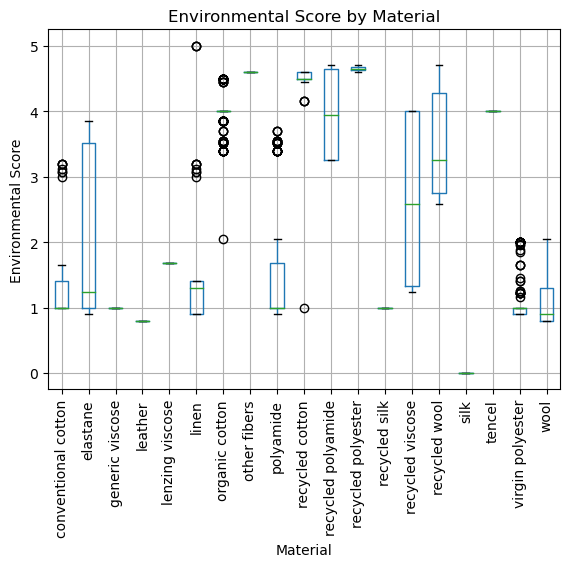

In [15]:
import matplotlib.pyplot as plt

# 2. Box plot of environmental score by material type
# First, we need to create a new dataframe where each row corresponds to a combination of product and material
df_material_score = pd.melt(df_explode, id_vars=['Product name', 'Environmental Score'], value_vars=['material_1', 'material_2', 'material_3', 'material_4'], value_name='Material').dropna()
df_material_score.boxplot(column='Environmental Score', by='Material', rot=90)
plt.ylabel('Environmental Score')
plt.title('Environmental Score by Material')
plt.suptitle('')  # Removes default subtitle to avoid duplication
plt.show()


In [12]:
# Fill NaN values in percentage columns with 0
for i in range(1, 6):
    df_explode[f'percentage_{i}'] = df_explode[f'percentage_{i}'].fillna(0)

# Fill NaN values in the material columns with 'NoMaterial' and ensure all values are strings
for i in range(1, 5):
    df_explode[f'material_{i}'] = df_explode[f'material_{i}'].fillna('NoMaterial').astype(str)

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Perform one-hot encoding for the material columns
encoder = OneHotEncoder(sparse=False)
encoded_materials = encoder.fit_transform(df_explode[[f'material_{i}' for i in range(1, 5)]])

# Create a DataFrame for the encoded columns
encoded_df = pd.DataFrame(encoded_materials, columns=encoder.get_feature_names_out([f'material_{i}' for i in range(1, 5)]))

# Remove unnecessary 'NoMaterial' columns from encoded_df
encoded_df = encoded_df.drop(columns=[f'material_{i}_NoMaterial' for i in range(1, 5)], errors='ignore')

# Concatenate the encoded DataFrame with the original DataFrame
df_explode_encoded = pd.concat([df_explode, encoded_df], axis=1)

# Drop the original material columns
df_explode_encoded = df_explode_encoded.drop(columns=[f'material_{i}' for i in range(1, 5)])

# Split the data into features (X) and target (y)
X = df_explode_encoded.drop(columns=['Product name', 'Environmental Score'])
y = df_explode_encoded['Environmental Score']

# Split the data into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/Users/phuongminhchu/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Khởi tạo mô hình hồi quy tuyến tính
model = LinearRegression()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm thử
y_pred = model.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")


MSE: 0.09031169215611048
R2 Score: 0.9605490642298506


- The value of MSE being 0.09 indicates that the error between the predicted values and the actual values is not large.
- The R squared value of 0.96 suggests that the model is quite good, explaining 96% of the variability of the target variable.
- But can we know the impact of each ingredient on the target variable? Specifically, which ingredients will help the product achieve a high environmental score and vice versa?

In [14]:
df_explode_encoded

,Product name,Environmental Score,percentage_1,percentage_2,percentage_3,percentage_4,percentage_5,material_1_conventional cotton,material_1_generic viscose,material_1_leather,...,material_2_recycled polyester,material_2_recycled viscose,material_2_virgin polyester,material_2_wool,material_3_elastane,material_3_organic cotton,material_3_polyamide,material_3_recycled polyester,material_3_recycled viscose,material_4_elastane
0,Recycled Cotton Jeans Sweatshirt Men Cassius,4.44,0.24,0.41,0.28,0.07,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,Recycled Cotton Jeans Sweater Men Marlon,4.60,0.80,0.15,0.05,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Recycled Cotton Jeans Sweater Men Pablo,4.60,0.80,0.15,0.05,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Recycled Cotton Oversize T-shirt Men Yves,4.50,0.50,0.50,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Unisex Recycled Cotton Jeans Vest Fred,4.60,0.80,0.15,0.05,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,pontallon,1.40,0.10,0.90,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,Men's T-Shirt,0.90,0.20,0.10,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,shorts,1.00,0.60,0.20,0.00,0.00,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,shorts,1.30,0.80,0.10,0.00,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Extract the coefficients of the model
coefficients = model.coef_

# Get the names of the features from the training data
feature_names = X_train.columns

# Create a DataFrame to store the material names and corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficients in descending order
coef_df = coef_df.sort_values('Coefficient', ascending=False)

# Print the DataFrame
print(coef_df)


                           Feature   Coefficient
37             material_4_elastane  2.317305e+12
4                     percentage_5  1.774847e+12
26      material_2_recycled cotton  1.320024e+10
27   material_2_recycled polyamide  3.136597e+00
0                     percentage_1  1.620405e+00
23       material_2_organic cotton  9.107579e-01
30     material_2_virgin polyester  7.581036e-01
24         material_2_other fibers  2.087127e-01
29     material_2_recycled viscose  1.664680e-01
22                material_2_linen  1.144641e-01
3                     percentage_4  1.031867e-01
28   material_2_recycled polyester  3.546144e-02
21             material_2_elastane -5.813329e-02
25            material_2_polyamide -6.358889e-02
32             material_3_elastane -1.321906e-01
20  material_2_conventional cotton -2.267344e-01
1                     percentage_2 -7.550251e-01
2                     percentage_3 -1.454955e+00
35   material_3_recycled polyester -1.468342e+00
33       material_3_

- Features like material_4_elastane, percentage_5, and material_2_recycled cotton have large positive coefficients, which could suggest that these features have a large positive impact on the Environmental Score.

- Features like material_1_leather, material_1_recycled cotton, material_1_organic cotton, and material_1_tencel have very large negative coefficients, suggesting that these features may have a large negative impact on the Environmental Score. 

- Other features like material_2_recycled polyamide, percentage_1, and material_2_organic cotton have relatively small coefficients (compared to other values in the table), suggesting that these features may have a smaller impact on the Environmental Score.

- However, with such large coefficient values, we should also consider the possibility of overfitting. Therefore, we use Lasso Regression to shrink the coefficients of less important features to zero, which helps reduce overfitting and improve the interpretability of the model.

In [20]:
from sklearn.linear_model import Lasso

# Create a Lasso regression model
model = Lasso(alpha=0.01)

# Train the model with data
model.fit(X_train, y_train)

# Extract the coefficients of the model
coefficients = model.coef_

# Create a DataFrame to store the feature names and corresponding coefficients
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by coefficients in descending order
coef_df = coef_df.sort_values('Coefficient', ascending=False)

# Print out the DataFrame
print(coef_df)


                           Feature  Coefficient
12      material_1_recycled cotton     2.574364
10       material_1_organic cotton     2.004670
15        material_1_recycled wool     0.755952
0                     percentage_1     0.517186
14     material_1_recycled viscose     0.338856
9                 material_1_linen     0.037161
34            material_3_polyamide     0.000000
33       material_3_organic cotton     0.000000
32             material_3_elastane    -0.000000
31                 material_2_wool    -0.000000
30     material_2_virgin polyester     0.000000
20  material_2_conventional cotton     0.000000
29     material_2_recycled viscose     0.000000
35   material_3_recycled polyester     0.000000
28   material_2_recycled polyester     0.000000
36     material_3_recycled viscose     0.000000
27   material_2_recycled polyamide     0.000000
26      material_2_recycled cotton     0.000000
24         material_2_other fibers     0.000000
23       material_2_organic cotton     0

The results show that some coefficients are equal to zero, which indicates that Lasso regression has removed some features from the model, deeming them as not important or not correlating with the prediction target.

Certain features with non-zero coefficients have implications for the 'Environmental Score' in our Lasso model:

- material_1_recycled cotton, material_1_organic cotton, and material_1_recycled wool all have large positive coefficients, which suggests that products using these recycled materials tend to have higher 'Environmental Score'.

- Conversely, material_1_conventional cotton, material_1_polyamide and material_1_leather all have negative coefficients, suggesting that products using these materials tend to have lower 'Environmental Score'.

# Conclussion